In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/Users/siripragadajayanth/Desktop/Capstone/Dataset/Gun_Violence_Record_Orignal.csv')

data.columns = data.columns.str.strip()

In [ ]:
columns_to_remove = [
    'Other Location', 'Religion', 'School Performance', 'Military Branch', 
    'Leakage', 'Leakage How', 'Leakage Who', 'Leakage Specific/Nonspecific', 'Specify Pop Culture Connection'
]
data_cleaned = data.drop(columns=columns_to_remove, errors='ignore')
data_cleaned['label'] = np.where(data_cleaned['Criminal Sentence'] == 0, 0, 1)
data_cleaned = data_cleaned.drop(columns=['Criminal Sentence'], errors='ignore')
columns_to_drop_non_numeric = [
    'Case #', 'Shooter Last Name', 'Shooter First Name', 'Full Date', 
    'Day of Week', 'Day', 'Month', 'Year', 'State'
]
data_cleaned = data_cleaned.drop(columns=columns_to_drop_non_numeric, errors='ignore')

In [ ]:
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)
data_cleaned_no_nan = data_cleaned.dropna()

X = data_cleaned_no_nan.drop(columns=['label'])
y = data_cleaned_no_nan['label']

correlation_matrix = X.corr()

upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

high_correlation_columns = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

data_cleaned_no_nan = data_cleaned_no_nan.drop(columns=high_correlation_columns, errors='ignore')

data_cleaned_no_nan.to_csv('/Users/siripragadajayanth/Desktop/Capstone/cleaned_data_after_correlation_removal.csv', index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned_no_nan.drop(columns=['label']), data_cleaned_no_nan['label'], test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.80      0.80      0.80         5

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



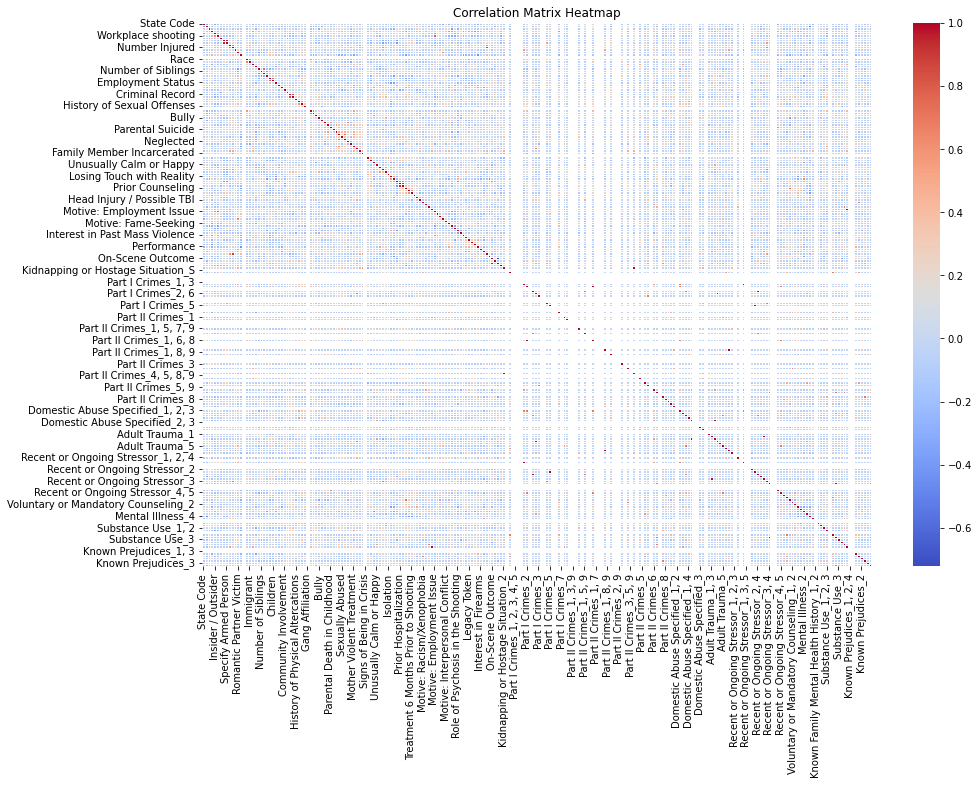

In [18]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
print("Columns with correlation higher than 0.9:", high_correlation_columns)

Columns with correlation higher than 0.9: ['Specify Armed Person', 'Voluntary or Involuntary Hospitalization', 'Part II Crimes_1, 6, 8', 'Part II Crimes_4', 'Adult Trauma_2', 'Adult Trauma_3', 'Recent or Ongoing Stressor_1', 'Recent or Ongoing Stressor_1, 3', 'Recent or Ongoing Stressor_2, 3', 'Recent or Ongoing Stressor_2, 4', 'Recent or Ongoing Stressor_2, 6', 'Substance Use_2, 3', 'Known Prejudices_1, 2, 3']
